In [2]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display, clear_output

def plot_1d(data):
    plt.figure(figsize=(15, 4))
    plt.plot(data)
    plt.show()

In [3]:
class Dyn_point_1D:
    def __init__(self, m = 1.0, x0 = 0.0, v0 = 0.0, dt = 0.01, A0 = np.array([[0, 1], [0, 0]])):
        self.m = m
        
        self.x = np.array([[x0], [v0]])
        self.dt = dt
        
        #state transition function
        self.A = A0
        
        #control -> xdot (matrix B from x_dot = Ax + Bu)
        self.B = np.array([[0], [1.0 / self.m]])
        
    def get_state(self):
        #print("state shape", self.x.shape)
        
        return self.x
    
    def sys_dyn(self, u):
        x_dot = np.zeros_like(self.x)
        
        x_dot = self.A @ self.x + self.B * u
        
        return x_dot
    
    def integrate_sys_dyn(self, sys_dyn):
        self.x = self.x + sys_dyn * self.dt
    
    def lqr_feedback(self, x, Q, R):
        #YOUR CODE HERE
        
        u = - K @ x
        
        return u


In [4]:
def run_episode(Q, R, x0 = 4.0, v0 = 2.0, A = np.array([[0.0, 1.0], [0.0, 0.0]])):
    dyn_point = Dyn_point_1D(x0 = x0, v0 = v0, A0 = A)

    iter_num = 15000
    i = 0

    x_traj = []
    v_traj = []
    u_traj = []

    while(True):
        #control = 1 * math.sin(i / 10.0)
        state = dyn_point.get_state()
        
        control = np.array([[-state[0, 0]]])
        #control = dyn_point.lqr_feedback(dyn_point.get_state(), Q, R)

        x_dot = dyn_point.sys_dyn(control)
        dyn_point.integrate_sys_dyn(x_dot)

        x_traj.append(state[0])
        v_traj.append(state[1, 0])
        u_traj.append(control[0, 0])

        i += 1

        if (i > iter_num):
            break
    
    return x_traj, v_traj, u_traj

In [5]:
def state_action_cost(x, u, Q, R):
    #print(x.shape, u.shape)
    
    cost = x.T @ Q @ x + u.T @ R @ u
    
    return cost

def episode_cost(x_hist, v_hist, u_hist, Q, R):
    total_cost = 0
    cost_hist = []
    
    for x, v, u in zip(x_hist, v_hist, u_hist):
        x_vec = np.array([x, v])
        u_vec = np.array([u])
                
        cost = state_action_cost(x_vec, u_vec, Q, R)
        
        total_cost += cost
        cost_hist.append(cost)
    
    return total_cost, cost_hist

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display, clear_output

def run_and_plot_episode(q1, q2, q3, r):
    Q = np.array([[q1, q2],
                  [q2, q3]])

    R = np.array([[r]])
    
    x_hist, v_hist, u_hist = run_episode(Q, R)
    
    #print(v_hist)
    
    total_cost, cost_hist = episode_cost(x_hist, v_hist, u_hist, Q, R)

    #print(total_cost)

    plot_1d(x_hist)
    plot_1d(v_hist)
    plot_1d(u_hist)
    plot_1d(cost_hist)

    plt.figure(figsize=(15, 15))
    plt.plot(x_hist, v_hist)
    plt.show()
    clear_output(wait = True)

<ipython-input-5-4d6b0c7f875a>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_vec = np.array([x, v])


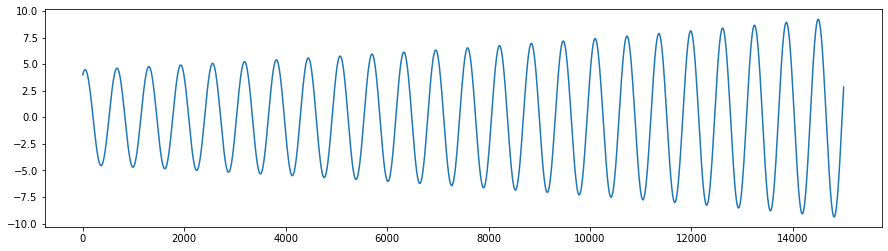

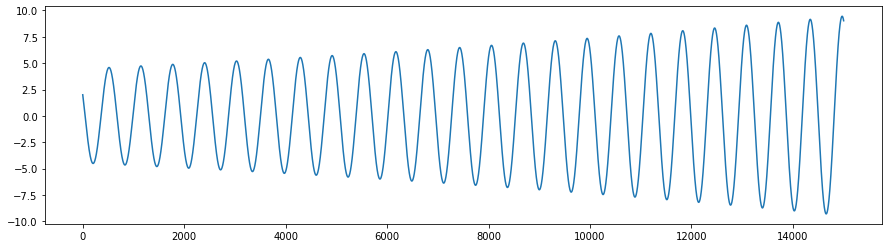

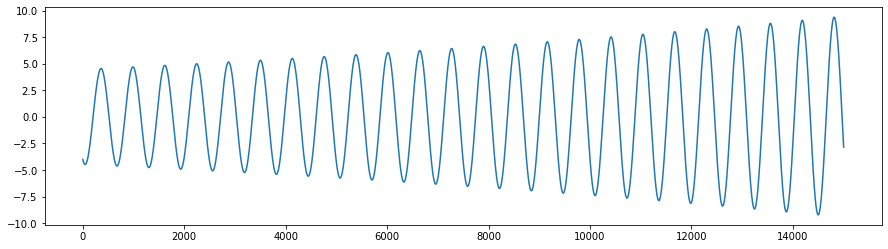

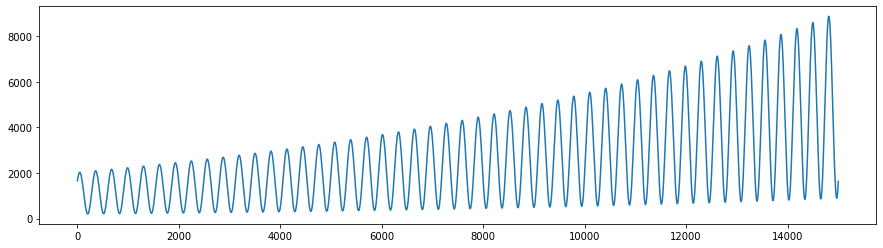

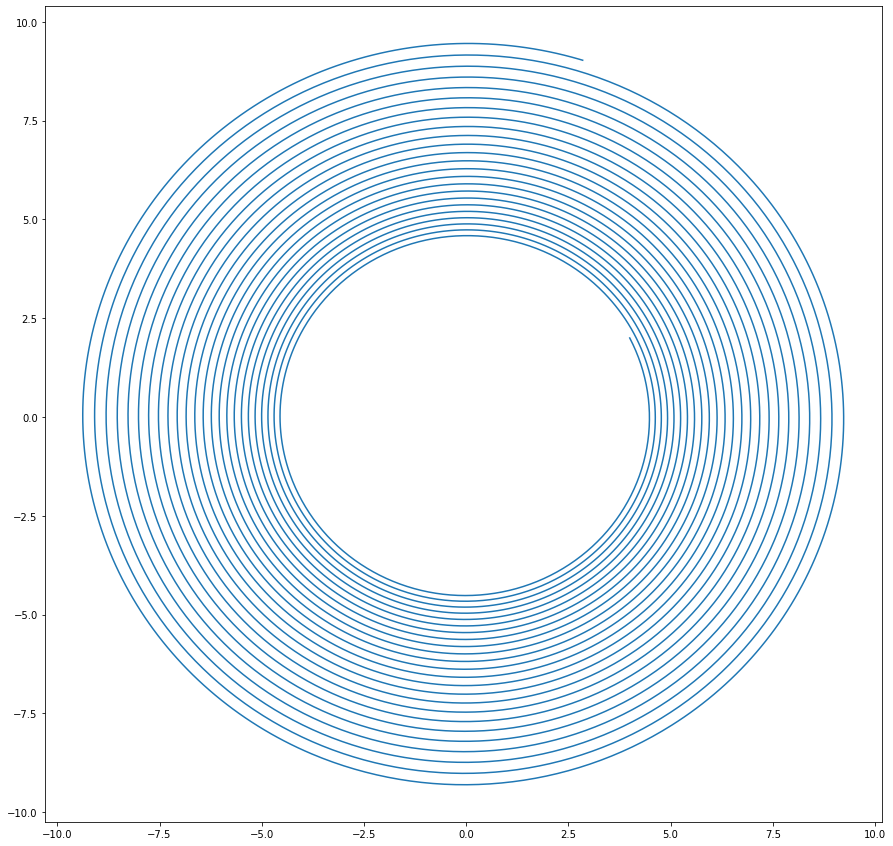

In [7]:
run_and_plot_episode(1, 0, 10, 100)

In [8]:
interact(run_and_plot_episode, q1=(1, 5, 2), q2=(1, 5, 2), q3=(1, 5, 2), r=(1, 5, 2))

interactive(children=(IntSlider(value=3, description='q1', max=5, min=1, step=2), IntSlider(value=3, descripti…

<function __main__.run_and_plot_episode(q1, q2, q3, r)>

In [9]:
def draw_block(cx, cy, scale, x, v, u, color = (234, 23, 123), canvas = None):
    if (canvas is None):
        canvas = np.ones((700, 700, 3)) * 0
    
    h, w, _ = canvas.shape
    
    cv2.line(canvas, (0, h // 2), (w, h // 2), color, 2)
    
    cv2.rectangle(canvas, (cx - w // 60, cy - h // 60), (w // 30, h // 30), color, -1)
    
    return canvas

In [10]:
canvas = draw_block(350, 350, 10, 10, 10, 10)
cv2.imshow("canvas", canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

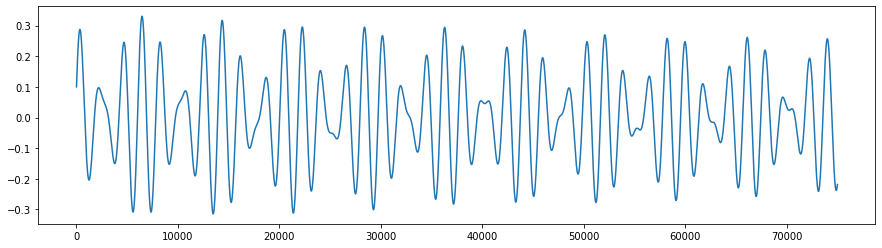

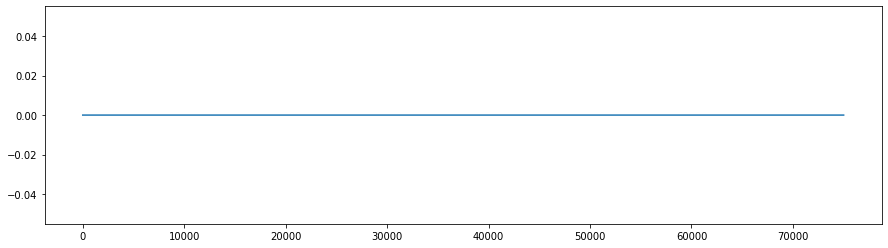

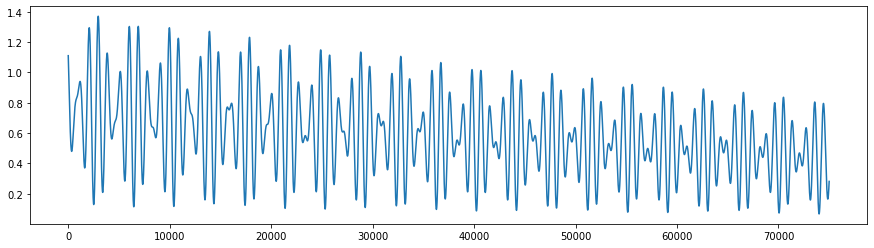

<Figure size 1080x1080 with 0 Axes>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from scipy import linalg

class Two_pend_one_spring:
    def __init__(self, m = 5.0, l = 1.0, k = 15.0, g = 10.0,
                 a0 = 0.0, ad0 = 0.0, b0 = 0.0, bd0 = 0.0,
                 dt = 0.001, Q = np.eye(4), R = np.eye(1)):
        self.m = m
        self.l = l
        self.k = k
        self.g = g
        
        self.x = np.array([[a0], [ad0], [b0], [bd0]])
        self.dt = dt
        
        #state transition function
        self.A = np.array\
        ([[0,                          1, 0,                          0],
          [-(m * g + k * l) / (m * l), -0.02, k / m,                      0],
          [0,                          0, 0,                          1],
          [k / m,                      0, -(m * g + k * l) / (m * l), -0.02]])
        
        #control -> xdot (matrix B from x_dot = Ax + Bu)
        self.B = np.array([[0], [0], [0], [1.0 / (m * l)]])
        
        self.Q = Q
        self.R = R
        
        #self.P = 
        #self.K = 
        
    def get_state(self):
        return self.x
    
    def sys_dyn(self, u):
        x_dot = np.zeros_like(self.x)
        
        ax = self.A @ self.x
        bu = self.B * u
        
        x_dot = ax + bu
        
        return x_dot
    
    def integrate_sys_dyn(self, sys_dyn):
        self.x = self.x + sys_dyn * self.dt
    
    def lqr_feedback(self, x):
        u = - self.K @ x
        
        return u

def state_action_cost(x, u, Q, R):
    #print(x.shape, u.shape)
    
    cost = x.T @ Q @ x + u.T @ R @ u
    
    return cost

def episode_cost(x_hist, u_hist, Q, R):
    total_cost = 0
    cost_hist = []
    
    for x, u in zip(x_hist, u_hist):
        cost = state_action_cost(x, u, Q, R)
        
        total_cost += cost
        cost_hist.append(cost)
    
    return total_cost, cost_hist

def run_2pend_episode(Q, R):
    dyn_point = Two_pend_one_spring(a0 = 0.1, ad0 = 1.0, b0 = -0.1, bd0 = 0.3, Q = Q, R = R)

    iter_num = 75000
    i = 0

    x_traj = []
    v_traj = []
    u_traj = []
    
    while(True):
        state = dyn_point.get_state()

        control = np.array([[0]])
        #control = dyn_point.lqr_feedback(state)

        x_dot = dyn_point.sys_dyn(control)
        
        #print("xdot: ", x_dot)
        
        dyn_point.integrate_sys_dyn(x_dot)
        
        x_traj.append(state)
        u_traj.append(control)

        i += 1

        if (i > iter_num):
            break
    
    return x_traj, u_traj

def run_and_plot_2pend_episode():
    Q = np.eye(4)

    R = np.eye(1) * 0.1
    
    x_hist, u_hist = run_2pend_episode(Q, R)
        
    total_cost, cost_hist = episode_cost(x_hist, u_hist, Q, R)
    
    x_list = [x[0] for x in x_hist]
    plot_1d(x_list)

    
    u_hist_list = [el[0, 0] for el in u_hist]
    cost_hist_list = [el[0, 0] for el in cost_hist]
    
    plot_1d(u_hist_list)
    plot_1d(cost_hist_list)

    plt.figure(figsize=(15, 15))
    #plt.plot(x_hist, v_hist)
    plt.show()
    clear_output(wait = True)
    
    return x_hist, u_hist

x_hist, u_hist = run_and_plot_2pend_episode()

In [19]:
def draw_pendulum(canvas, x, y, l, alpha, color = (123, 234, 234), inverted = False):
    direction = 1
    
    if (inverted == True):
        direction = -1
    
    endpoint = (int(x + l * np.cos(alpha + direction * np.pi / 2)),
                int(y + l * np.sin(alpha + direction * np.pi / 2)))
    
    cv2.line(canvas, (x, y), endpoint, color, 5)
    
    cv2.circle(canvas, endpoint, 25, (123, 23, 234), -1)

def animate_pendulums_trajectory(x_traj):
    WIND_X = 700
    WIND_Y = 700
    
    canvas = np.ones((700, 700, 3), np.uint8) * 70
    
    i = 0
    
    while (True):        
        x = x_traj[i]
        i += 14
        
        if (i >= len(x_traj)):
            break
        
        canvas[:, :, :] = 70
             
        alpha, _, beta, _ = x
        
        draw_pendulum(canvas, WIND_X // 2 - 50, WIND_Y // 2, 250, alpha)
        draw_pendulum(canvas, WIND_X // 2 + 50, WIND_Y // 2, 250, beta)
        
        cv2.imshow("pendels", canvas)
        
        key = cv2.waitKey(10) & 0xFF
        
        if (key == ord('q')):
            break
            

    cv2.destroyAllWindows()
    cv2.waitKey(10)

animate_pendulums_trajectory(x_hist)

Solving ARE (Algebraic Riccati Equation)

$A^T P + P A + Q - P B R^{-1} B^T P = 0$

In [20]:
import numpy as np
from scipy import linalg

a = np.array([[0, 1],
              [0, 0]])

b = np.array([[0],
              [1]])

q = np.array([[1, 0],
              [0, 1]])

r = 1

x = linalg.solve_continuous_are(a, b, q, r)

print(x)

np.allclose(a.T.dot(x) + x.dot(a)-x.dot(b).dot(b.T).dot(x), -q)

[[1.73205081 1.        ]
 [1.         1.73205081]]


True

In [21]:
import numpy as np
from scipy import linalg

m = 5.0
l = 1.0
k = 2.0
g = 10.0

a = np.array\
        ([[0,                          1, 0,                          0],
          [-(m * g + k * l) / (m * l), 0, k / m,                      0],
          [0,                          0, 0,                          1],
          [k / m,                      0, -(m * g + k * l) / (m * l), 0]])

b = np.array([[0],
              [0],
              [0],
              [1 / (m * l)]])

q = np.eye(4)

r = np.eye(1)

x = linalg.solve_continuous_are(a, b, q, r)

#np.set_printoptions(precision=2)
#print(x)

print(np.array_str(x, precision=2, suppress_small=True))

np.allclose(a.T.dot(x) + x.dot(a)-x.dot(b).dot(b.T).dot(x), -q)

[[138.25  -0.5   -4.84  -9.62]
 [ -0.5   13.3    9.63   0.05]
 [ -4.84   9.63  70.56   0.42]
 [ -9.62   0.05   0.42   6.78]]


True